In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Packages, import data

In [2]:
users = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
user_engagement['time_stamp'] =  pd.to_datetime(user_engagement['time_stamp'])

In [6]:
df = user_engagement.set_index('time_stamp')
df

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


# Adopted Users

This is where I did the adopted users reformatting of the dataset.  The steps below lead me to finding which users had logged in for 3 or more times in a 7 day period.

In [7]:
newdf = df.groupby([pd.Grouper(freq='W'), 'user_id'])['visited'].count()

In [8]:
df2 = pd.DataFrame(newdf)

In [9]:
dffiltered = df2[df2['visited'] >= 3]

In [10]:
dffiltered

visited
time_stamp user_id         
2012-06-10 1693           3
2012-06-17 728            4
           11764          3
2012-06-24 1693           3
           5297           3
...                     ...
2014-06-08 11573          3
           11688          3
           11806          3
           11895          3
           11924          3

[33859 rows x 1 columns]

In [11]:
dffiltered = dffiltered.reset_index()

In [12]:
dffiltered

,time_stamp,user_id,visited
0,2012-06-10,1693,3
1,2012-06-17,728,4
2,2012-06-17,11764,3
3,2012-06-24,1693,3
4,2012-06-24,5297,3
...,...,...,...
33854,2014-06-08,11573,3
33855,2014-06-08,11688,3
33856,2014-06-08,11806,3
33857,2014-06-08,11895,3


In [13]:
adoptedusers = dffiltered[['user_id']]

In [14]:
dffiltered = adoptedusers.rename(columns={'user_id': 'object_id'})

In [15]:
adoptedusers = dffiltered[['object_id']].drop_duplicates()

In [16]:
adoptedusers['Adopted_User'] = 1

# Merging Adopted Users with Master Dataset

Below I am adding my adopted users list to the master dataset.

In [17]:
len(users)

12000

In [18]:
mergeddf = users.merge(adoptedusers, on='object_id', how='left')

In [19]:
mergeddf.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [20]:
mergeddf['Adopted_User'] = mergeddf['Adopted_User'].replace(np.nan, 0)

In [21]:
mergeddf.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


Create dummies for categorical variables.  Change "invitedby" column to be 1s or 0s depending on whether or not the user was invited or not. Get rid of NAs.

In [22]:
df = pd.get_dummies(mergeddf, columns=['creation_source'])

In [23]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
invited_by_user_id,0.46525
last_session_creation_time,0.26475


In [24]:
def invited_by(x):
    if x > 0:
        return 1
    else:
        return 0

In [25]:
df['invitedby'] = df['invited_by_user_id'].apply(invited_by)

In [26]:
df['invitedby'].value_counts()

1    6417
0    5583
Name: invitedby, dtype: int64

In [27]:
del df['invited_by_user_id']

In [28]:
df.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invitedby
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,0.0,1,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,1.0,0,1,0,0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,0.0,0,1,0,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,0.0,1,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,0.0,1,0,0,0,0,1


In [29]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
last_session_creation_time,0.26475


In [30]:
df['last_session_creation_time'] = df['last_session_creation_time'].fillna(0)

In [31]:
df.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invitedby
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,0.0,1,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,1.0,0,1,0,0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,0.0,0,1,0,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,0.0,1,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,0.0,1,0,0,0,0,1


# So which factors are most closely correlated with Adopted Users?

In [32]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invitedby
object_id,1.000000,0.010000,-0.030000,-0.020000,0.000000,0.010000,-0.010000,-0.000000,-0.000000,0.000000,0.020000,-0.010000
last_session_creation_time,0.010000,1.000000,0.010000,0.010000,0.010000,0.230000,-0.000000,0.020000,-0.390000,0.180000,0.220000,0.020000
opted_in_to_mailing_list,-0.030000,0.010000,1.000000,0.480000,0.000000,0.010000,0.000000,0.010000,-0.010000,0.000000,-0.000000,0.010000
enabled_for_marketing_drip,-0.020000,0.010000,0.480000,1.000000,0.010000,0.010000,-0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000
org_id,0.000000,0.010000,0.000000,0.010000,1.000000,0.060000,-0.000000,-0.020000,0.010000,0.020000,-0.000000,-0.020000
Adopted_User,0.010000,0.230000,0.010000,0.010000,0.060000,1.000000,0.040000,-0.010000,-0.070000,0.020000,0.030000,0.020000
creation_source_GUEST_INVITE,-0.010000,-0.000000,0.000000,-0.000000,-0.000000,0.040000,1.000000,-0.350000,-0.220000,-0.220000,-0.170000,0.440000
creation_source_ORG_INVITE,-0.000000,0.020000,0.010000,0.000000,-0.020000,-0.010000,-0.350000,1.000000,-0.340000,-0.340000,-0.270000,0.690000
creation_source_PERSONAL_PROJECTS,-0.000000,-0.390000,-0.010000,-0.010000,0.010000,-0.070000,-0.220000,-0.340000,1.000000,-0.210000,-0.170000,-0.500000
creation_source_SIGNUP,0.000000,0.180000,0.000000,0.000000,0.020000,0.020000,-0.220000,-0.340000,-0.210000,1.000000,-0.170000,-0.490000


# Building Random Forest Classification Model

Doesn't look like there are any factors with strong correlation.  Let's build a model, however, to take all of the numeric components and split them by the dependent and independent variables.

In [33]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'Adopted_User',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'invitedby'],
      dtype='object')

In [34]:
y = df[['Adopted_User']]
X = df[['last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'invitedby']]

In [35]:
X.dtypes

last_session_creation_time            float64
opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
creation_source_GUEST_INVITE            uint8
creation_source_ORG_INVITE              uint8
creation_source_PERSONAL_PROJECTS       uint8
creation_source_SIGNUP                  uint8
creation_source_SIGNUP_GOOGLE_AUTH      uint8
invitedby                               int64
dtype: object

#  Prediction Model and Final Steps

.896 is a great accuracy score for so many variables with such a low correlation!   

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y,random_state=5)

<ipython-input-40-a3cfc5ae30ae>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(Xlr, ylr)


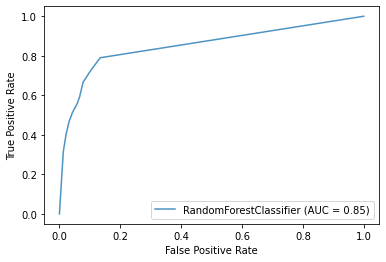

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve


rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(Xlr, ylr)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, Xtestlr, ytestlr, ax=ax, alpha=0.8)
plt.show()

In [41]:
print(accuracy_score(rfc.predict(Xtestlr), ytestlr))

0.8966666666666666


# Conclusion

Taken together, all the variables provided in the dataset can build a reasonably strong Random Forest Classification model.  I could do some more hyperparameter tuning if I wanted to get it as accurate as possible, but this is a great starting point for this analysis.   I also tried looking at doing Principal Component Analysis as part of this exercise, and it seems like that would be something to explore to make the model even more accurate.   